# **Self-Study 2.0: Simulated EMG Data of Professional Drummers**

### Key Steps in EMG Data Analysis

1. Signal acquisition: Simulation of raw EMG data
2. Preprocessing: Bandpass filtering to remove noise and artifacts
3. Rectification: Conversion of signal into positive values
4. Smoothing: Use moving average to reduce high-frequency fluctuations
5. Visualisation: plots and graphs of processed EMG signals for analysis
6. Co-contraction: Perform simulation for muscle combinations (realistic muscle movements)

In [ ]:
# install packages
!pip install neurokit2
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib.pyplot
!pip install scikit-learn

In [ ]:
# load packages
import neurokit2 as nk

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import butter, filtfilt, welch
from scipy.integrate import simpson
from scipy.stats import f_oneway

In [ ]:
# increase image size
plt.rcParams['figure.figsize'] = [10, 6]

# Step 1: Simulate EMG Data of Drummers

### Example 1: Basic EMG

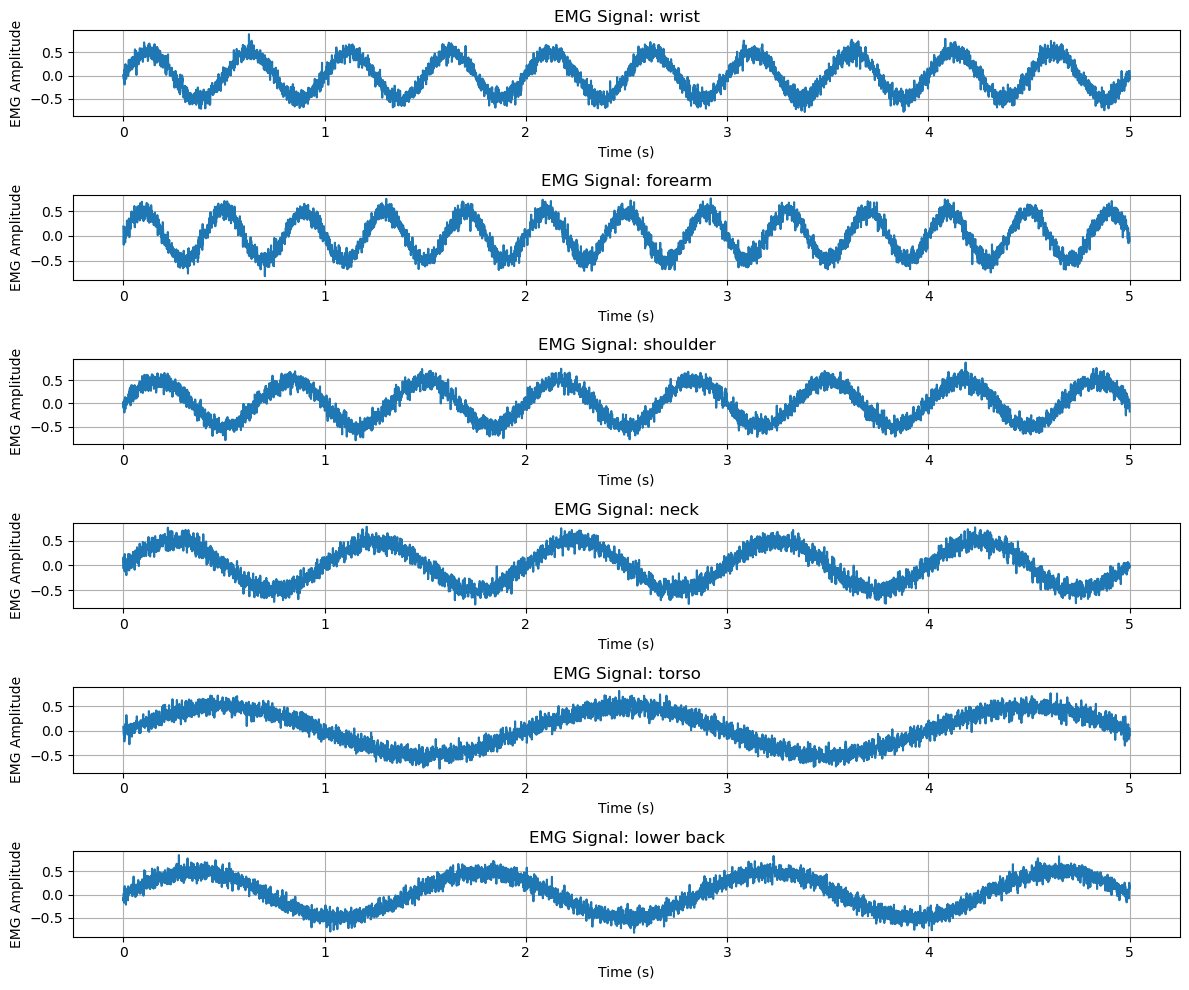

In [ ]:
# parameters

fs = 1000  # sampling frequency (Hz)
duration = 5  # signal duration (seconds)
time = np.linspace(0, duration, fs * duration)

# function to generate a synthetic EMG signal
def generate_emg_signal(frequency=1, noise_level=0.1, length=5000):
    # generate a simple sine wave to represent muscle activation 
    emg_signal = 0.5 * np.sin(2 * np.pi * frequency * time[:length])
    # add random noise to simulate real EMG variability
    noise = noise_level * np.random.randn(length)

    return emg_signal + noise

# simulate EMG Signals for different muscle groups
muscle_groups = {
    'wrist': generate_emg_signal(frequency=2),
    'forearm': generate_emg_signal(frequency=2.5),
    'shoulder': generate_emg_signal(frequency=1.5),
    'neck': generate_emg_signal(frequency=1),
    'torso': generate_emg_signal(frequency=0.5),
    'lower back': generate_emg_signal(frequency=0.7)
}

# plot the simulated (raw & unprocessed) EMG signals
fig, axs = plt.subplots(len(muscle_groups), 1, figsize=(12, 10))

for i, (muscle, signal) in enumerate(muscle_groups.items()):
    ax = axs[i]
    ax.plot(time, signal)
    ax.set_title(f'EMG Signal: {muscle}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('EMG Amplitude')
    ax.grid()

plt.tight_layout()
plt.show()

### Example 2 - Enhanced EMG

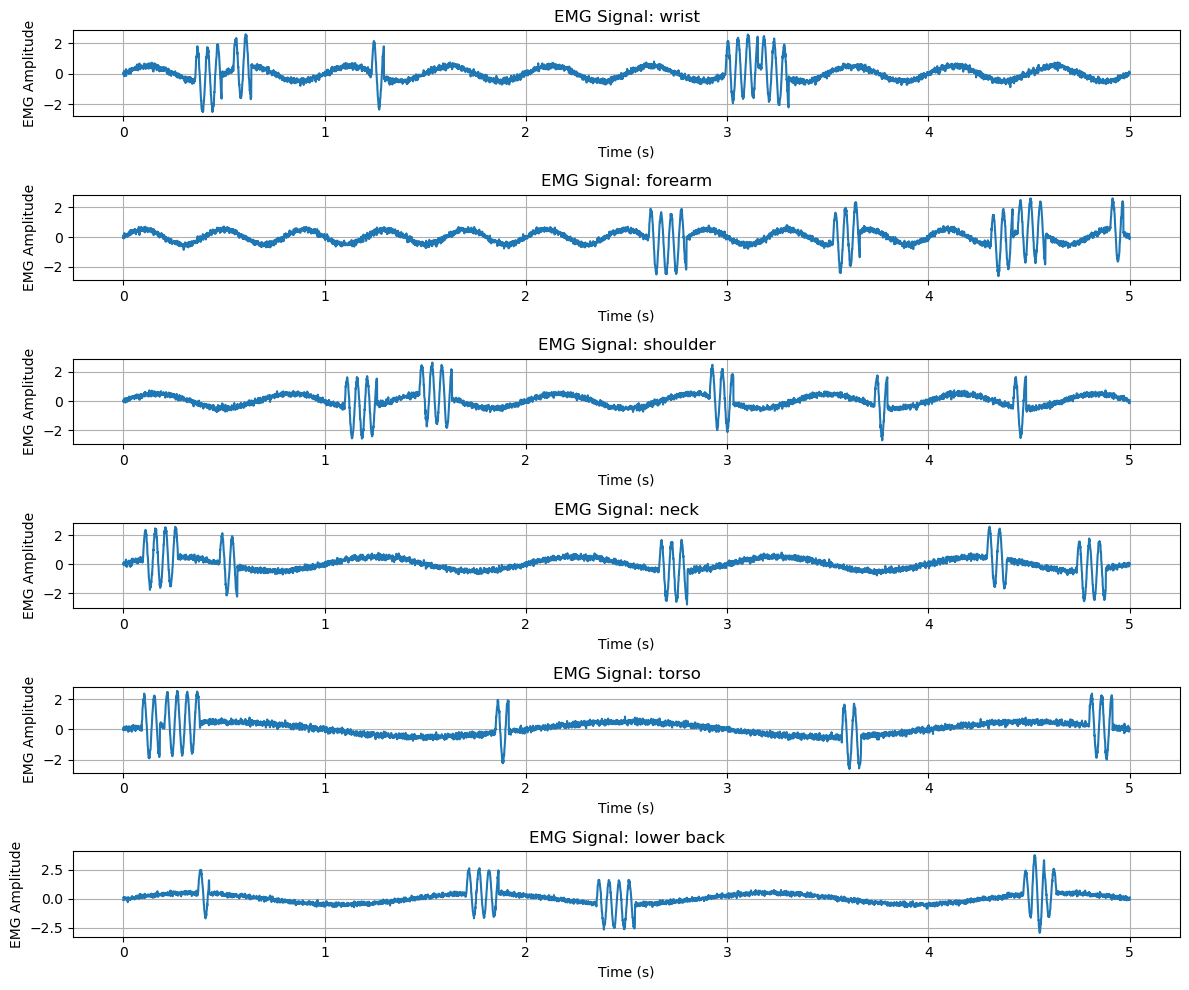

In [ ]:
# Enhanced simulation of EMG data of drummers

# parameters
fs = 1000  # sampling frequency (Hz)
duration = 5  # signal duration (seconds)
time = np.linspace(0, duration, fs * duration)

# function to generate more realistic EMG signals for drummer muscle activity
def generate_realistic_emg_signal(frequency=1, noise_level=0.1, length=5000, bursts=True):
    # generate background muscle activity (low-frequency component)
    emg_signal = 0.5 * np.sin(2 * np.pi * frequency * time[:length])
    
    # add bursts (phasic activity), simulating bursts of muscle activation during drumming
    if bursts:
        # generate random bursts of high-frequency muscle contractions
        burst_intervals = np.random.randint(50, 200, 5)
        for interval in burst_intervals:
            burst_start = np.random.randint(0, length - interval)
            emg_signal[burst_start:burst_start + interval] += 2 * np.sin(2 * np.pi * 20 * time[:interval])
    
    # add random noise (to simulate electrode noise and real variability)
    noise = noise_level * np.random.randn(length)
    
    return emg_signal + noise

# simulate EMG Signals for different muscle groups
muscle_groups = {
    'wrist': generate_realistic_emg_signal(frequency=2),
    'forearm': generate_realistic_emg_signal(frequency=2.5),
    'shoulder': generate_realistic_emg_signal(frequency=1.5),
    'neck': generate_realistic_emg_signal(frequency=1),
    'torso': generate_realistic_emg_signal(frequency=0.5),
    'lower back': generate_realistic_emg_signal(frequency=0.7)
}

# plot the simulated (raw & unprocessed) EMG signals
fig, axs = plt.subplots(len(muscle_groups), 1, figsize=(12, 10))

for i, (muscle, signal) in enumerate(muscle_groups.items()):
    ax = axs[i]
    ax.plot(time, signal)
    ax.set_title(f'EMG Signal: {muscle}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('EMG Amplitude')
    ax.grid()

plt.tight_layout()
plt.show()

### Example 3 - Further Enhanced EMG

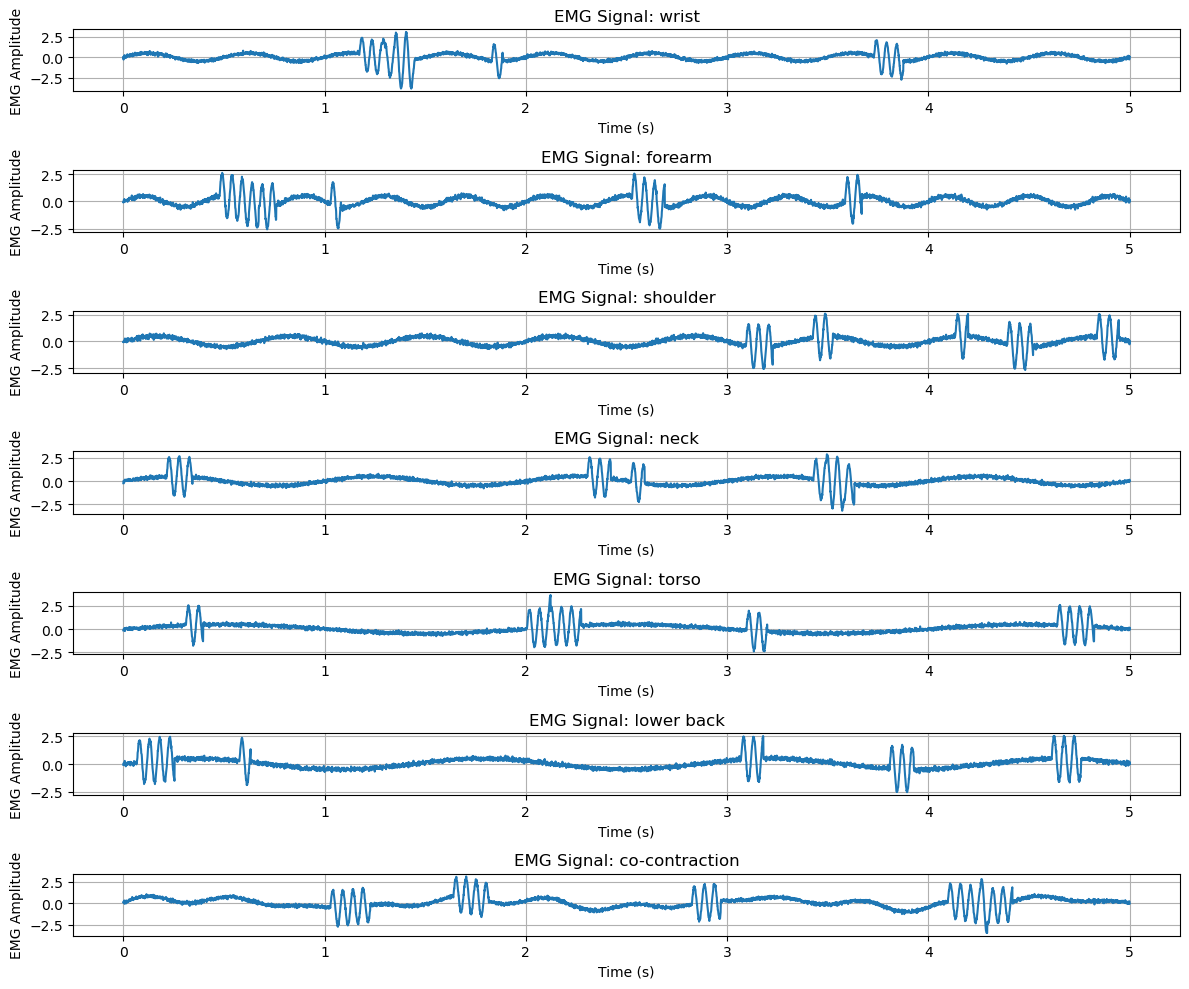

In [ ]:
### Another enhanced version - integrating contraction & co-contraction of muscle groups

# Let's simulate a realistic EMG data set, incl. muscle groups, random noise (muscle activity & signal noise) & contraction and co-contraction of muscles!

# parameters
fs = 1000  # sampling frequency (Hz)
duration = 5  # signal duration (seconds)
time = np.linspace(0, duration, fs * duration)

# function to generate more realistic EMG signals with contraction and co-contraction
def generate_realistic_emg_signal(frequency=1, noise_level=0.1, length=5000, bursts=True, co_contraction=False):
    # generate background muscle activity (low-frequency component)
    emg_signal = 0.5 * np.sin(2 * np.pi * frequency * time[:length])
    # add bursts (phasic activity)
    if bursts:
        # generate random bursts of high-frequency muscle contractions
        burst_intervals = np.random.randint(50, 200, 5)  # random burst intervals
        for interval in burst_intervals:
            burst_start = np.random.randint(0, length - interval)
            emg_signal[burst_start:burst_start + interval] += 2 * np.sin(2 * np.pi * 20 * time[:interval])
    
    # add co-contraction: multiple muscle groups contracting at the same time
    if co_contraction:
        # define the overlap btw. 2 muscles (e.g. forearm and wrist)
        forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length])  # forearm with higher frequency
        wrist_signal = 0.5 * np.sin(2 * np.pi * 2 * time[:length])  # wrist with lower frequency
        combined_signal = 0.5 * (forearm_signal + wrist_signal)  # simulate co-contraction
        # add the combined co-contraction signal to the original signal
        emg_signal += combined_signal
    
    # add random noise (to simulate electrode noise and real variability)
    noise = noise_level * np.random.randn(length)
    
    return emg_signal + noise

# simulate EMG Signals for different muscle groups with co-contraction for some muscles
muscle_groups = {
    'wrist': generate_realistic_emg_signal(frequency=2, co_contraction=False),
    'forearm': generate_realistic_emg_signal(frequency=2.5, co_contraction=False),
    'shoulder': generate_realistic_emg_signal(frequency=1.5, co_contraction=False),
    'neck': generate_realistic_emg_signal(frequency=1, co_contraction=False),
    'torso': generate_realistic_emg_signal(frequency=0.5, co_contraction=False),
    'lower back': generate_realistic_emg_signal(frequency=0.7, co_contraction=False),
    'co-contraction': generate_realistic_emg_signal(frequency=0.7, co_contraction=True)  # simulate co-contraction scenario
}

# plot the simulated (raw & unprocessed) EMG signals
fig, axs = plt.subplots(len(muscle_groups), 1, figsize=(12, 10))

for i, (muscle, signal) in enumerate(muscle_groups.items()):
    ax = axs[i]
    ax.plot(time, signal)
    ax.set_title(f'EMG Signal: {muscle}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('EMG Amplitude')
    ax.grid()

plt.tight_layout()
plt.show()

# Step 2: Preprocessing of the EMG Data

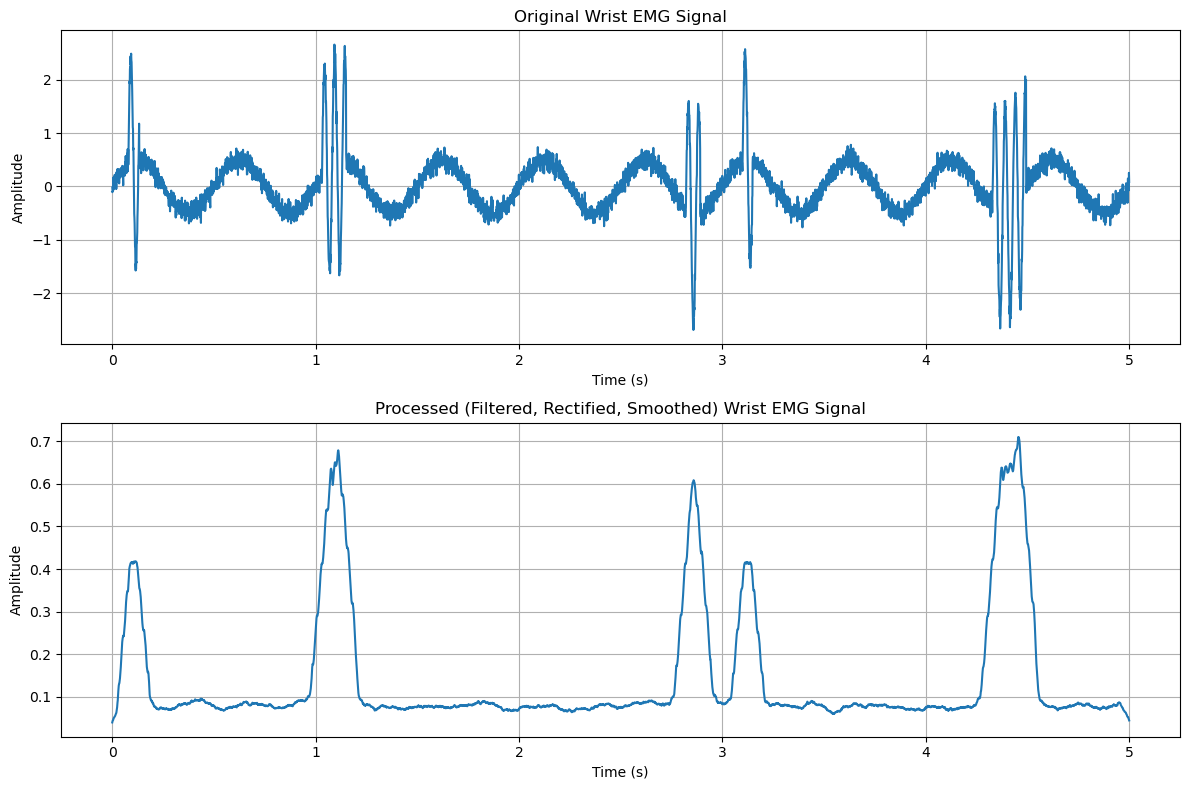

In [ ]:
## Preprocessing of the Simulated EMG Data (Bandpass Filtering, Rectification, and Smoothing)

# sampling parameters
fs = 1000  # sampling frequency (Hz)
duration = 5  # signal duration (seconds)
time = np.linspace(0, duration, fs * duration)

# function to generate more realistic EMG signals with contraction and co-contraction
def generate_realistic_emg_signal(frequency=1, noise_level=0.1, length=5000, bursts=True, co_contraction=False):
    # generate background muscle activity (low-frequency component)
    emg_signal = 0.5 * np.sin(2 * np.pi * frequency * time[:length])
    
    # add bursts (phasic activity)
    if bursts:
        # generate random bursts of high-frequency muscle contractions
        burst_intervals = np.random.randint(50, 200, 5)  # Random burst intervals
        for interval in burst_intervals:
            burst_start = np.random.randint(0, length - interval)
            emg_signal[burst_start:burst_start + interval] += 2 * np.sin(2 * np.pi * 20 * time[:interval])
    
    # add co-contraction: multiple muscle groups contracting at the same time
    if co_contraction:
        # define the overlap between two muscles, e.g., forearm and wrist
        forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length])  # forearm with higher frequency
        wrist_signal = 0.5 * np.sin(2 * np.pi * 2 * time[:length])  # wrist with lower frequency
        combined_signal = 0.5 * (forearm_signal + wrist_signal)  # simulate co-contraction
        # add the combined co-contraction signal to the original signal
        emg_signal += combined_signal
    # add random noise (to simulate electrode noise and real variability)
    noise = noise_level * np.random.randn(length)
    
    return emg_signal + noise

# bandpass filter function
def bandpass_filter(signal, lowcut=20.0, highcut=499.0, fs=1000, order=4):
    nyquist = 0.5 * fs  # nyquist frequency is half the sampling rate
    low = lowcut / nyquist  # normalize the low cutoff frequency
    high = highcut / nyquist  # normalize the high cutoff frequency
    
    # ensure frequencies are within the valid range
    if not (0 < low < 1 and 0 < high < 1):
        raise ValueError(f"Critical frequencies must satisfy 0 < low < high < 1, but got low={low}, high={high}.")
    
    # create the Butterworth filter
    b, a = butter(order, [low, high], btype='band')
    
    # apply the filter to the signal using filtfilt (zero-phase filtering)
    return filtfilt(b, a, signal)

# simulate EMG signals for different muscle groups
muscle_groups = {
    'wrist': generate_realistic_emg_signal(frequency=2, co_contraction=False),
    'forearm': generate_realistic_emg_signal(frequency=2.5, co_contraction=False),
    'shoulder': generate_realistic_emg_signal(frequency=1.5, co_contraction=False),
    'neck': generate_realistic_emg_signal(frequency=1, co_contraction=False),
    'torso': generate_realistic_emg_signal(frequency=0.5, co_contraction=False),
    'lower back': generate_realistic_emg_signal(frequency=0.7, co_contraction=False),
    'co-contraction': generate_realistic_emg_signal(frequency=0.7, co_contraction=True)  # simulate co-contraction scenario
}

# let's check the dimensions & make sure to use 1D arrays
for muscle, signal in muscle_groups.items():
    if signal.ndim != 1:
        raise ValueError(f"The EMG signal for {muscle} is not 1D, it has shape {signal.shape}.")

# select the wrist signal to process
signal_wrist = muscle_groups['wrist']

# bandpass filtering, rectifying, and smoothing the wrist signal
try:
    filtered_signal = bandpass_filter(signal_wrist, lowcut=20, highcut=499, fs=fs)  # changed highcut to 499
    rectified_signal = np.abs(filtered_signal)  # rectification
    smoothed_signal = np.convolve(rectified_signal, np.ones(100) / 100, mode='same')  # moving average smoothing
except ValueError as e:
    print(f"Error during signal processing: {e}")
    raise

# plot the original and processed signal using subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# plot the original wrist EMG signal
ax[0].plot(time[:len(signal_wrist)], signal_wrist)
ax[0].set_title('Original Wrist EMG Signal')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

# plot the processed wrist EMG signal (filtered, rectified, and smoothed)
ax[1].plot(time[:len(smoothed_signal)], smoothed_signal)
ax[1].set_title('Processed (Filtered, Rectified, Smoothed) Wrist EMG Signal')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()

plt.tight_layout()
plt.show()

<bound method _AxesBase.set_ylabel of <Axes: title={'center': 'Torso EMG Signal'}, xlabel='Time (s)'>>

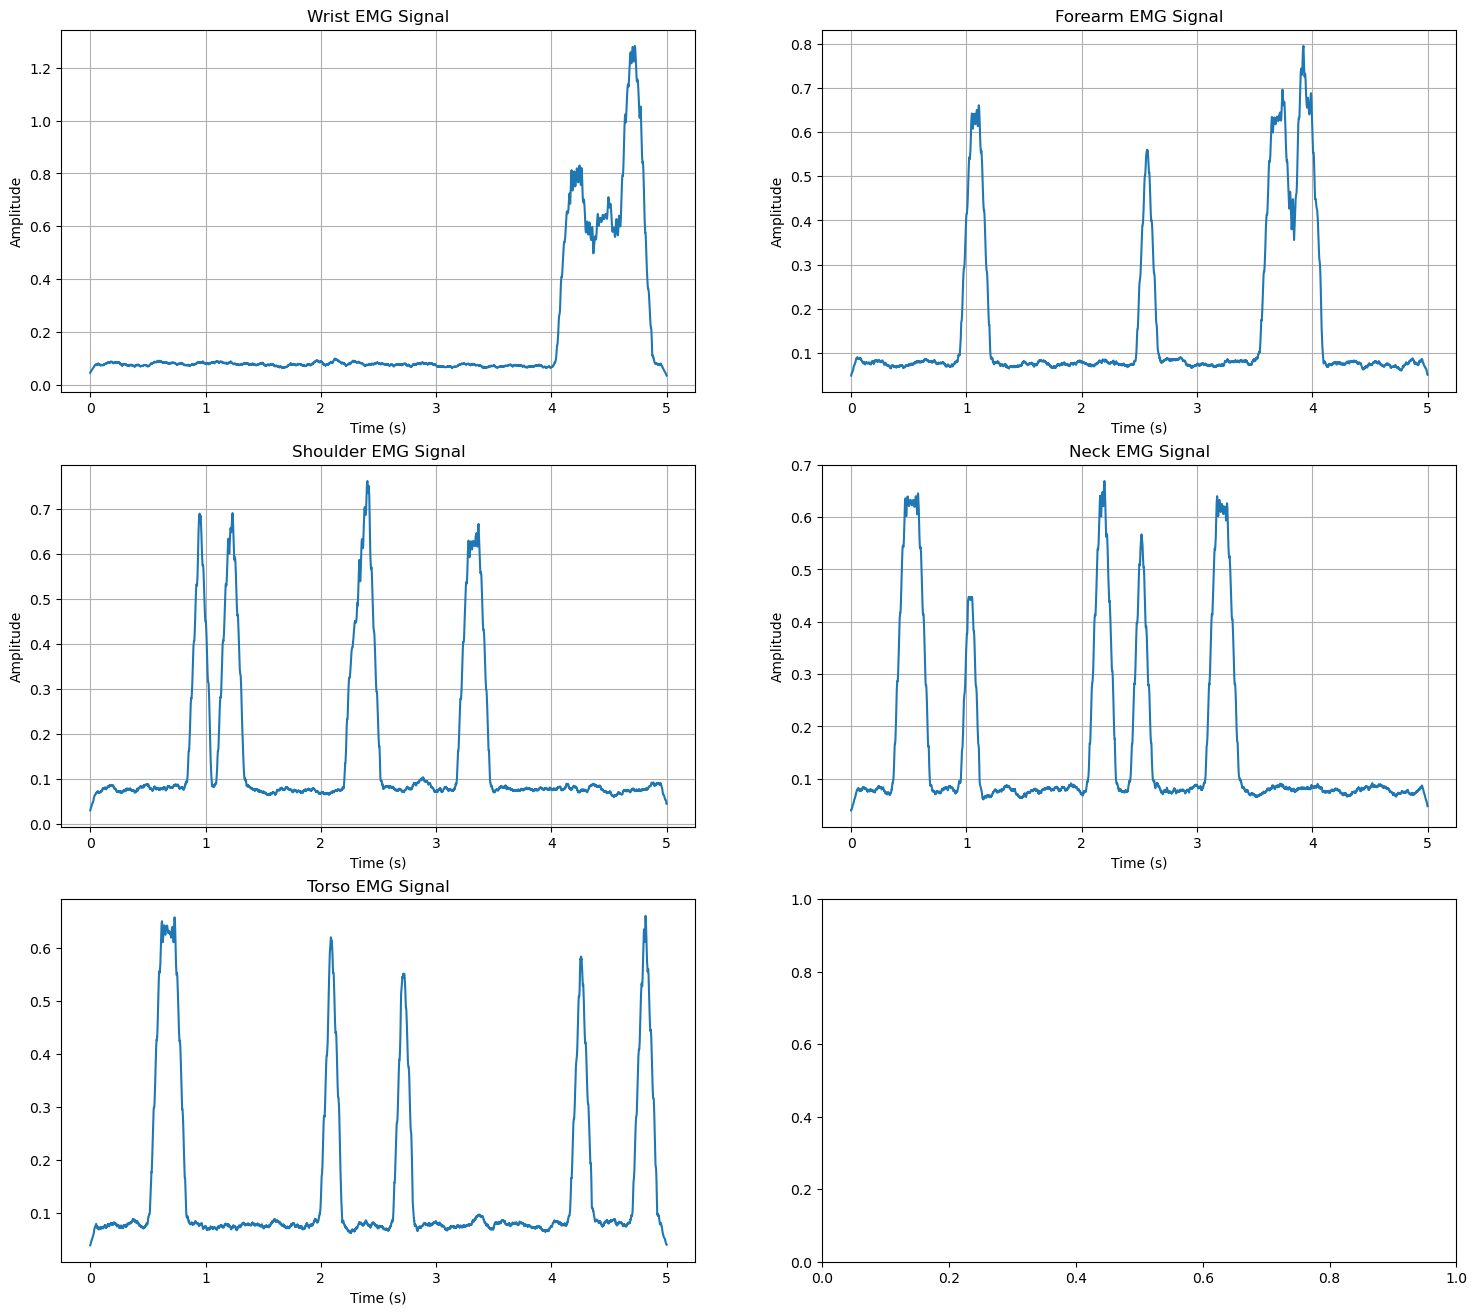

In [ ]:
# ´sampling parameters
fs = 1000  # sampling frequency (Hz)
duration = 5  # signal duration (seconds)
time = np.linspace(0, duration, fs * duration)

# function to generate more realistic EMG signals with contraction and co-contraction
def generate_realistic_emg_signal(frequency=1, noise_level=0.1, length=5000, bursts=True, co_contraction=False):
    # generate background muscle activity (low-frequency component)
    emg_signal = 0.5 * np.sin(2 * np.pi * frequency * time[:length])
    
    # add bursts (phasic activity)
    if bursts:
        # generate random bursts of high-frequency muscle contractions
        burst_intervals = np.random.randint(50, 200, 5)  # random burst intervals
        for interval in burst_intervals:
            burst_start = np.random.randint(0, length - interval)
            emg_signal[burst_start:burst_start + interval] += 2 * np.sin(2 * np.pi * 20 * time[:interval])
    
    # add co-contraction: multiple muscle groups contracting at the same time
    if co_contraction:
        # define the overlap btw. 2 muscles, e.g., forearm and wrist
        forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length])  # forearm with higher frequency
        wrist_signal = 0.5 * np.sin(2 * np.pi * 2 * time[:length])  # wrist with lower frequency
        combined_signal = 0.5 * (forearm_signal + wrist_signal)  # simulate co-contraction
        # add the combined co-contraction signal to the original signal
        emg_signal += combined_signal
    # add random noise (to simulate electrode noise and real variability)
    noise = noise_level * np.random.randn(length)
    
    return emg_signal + noise

# bandpass filter function
def bandpass_filter(signal, lowcut=20.0, highcut=499.0, fs=1000, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency is half the sampling rate
    low = lowcut / nyquist  # normalise the low cutoff frequency
    high = highcut / nyquist  # normalise the high cutoff frequency
    
    # ensure frequencies are within the valid range
    if not (0 < low < 1 and 0 < high < 1):
        raise ValueError(f"Critical frequencies must satisfy 0 < low < high < 1, but got low={low}, high={high}.")
    
    # create the butterworth filter
    b, a = butter(order, [low, high], btype='band')
    
    # apply the filter to the signal using filtfilt (zero-phase filtering)
    return filtfilt(b, a, signal)

# simulate EMG signals for different muscle groups
muscle_groups = {
    'wrist': generate_realistic_emg_signal(frequency=2, co_contraction=False),
    'forearm': generate_realistic_emg_signal(frequency=2.5, co_contraction=False),
    'shoulder': generate_realistic_emg_signal(frequency=1.5, co_contraction=False),
    'neck': generate_realistic_emg_signal(frequency=1, co_contraction=False),
    'torso': generate_realistic_emg_signal(frequency=0.5, co_contraction=False),
    'lower back': generate_realistic_emg_signal(frequency=0.7, co_contraction=False),
    'co-contraction': generate_realistic_emg_signal(frequency=0.7, co_contraction=True)  # simulate co-contraction scenario
}

# let's check the dimensions & make sure to work with 1D arrays
for muscle, signal in muscle_groups.items():
    if signal.ndim != 1:
        raise ValueError(f"The EMG signal for {muscle} is not 1D, it has shape {signal.shape}.")

# select the wrist signal to process
signal_wrist = muscle_groups['wrist']
signal_forearm = muscle_groups['forearm']
signal_shoulders = muscle_groups['shoulder']
signal_neck = muscle_groups['neck']
signal_torso = muscle_groups['torso']
signal_lower_back = muscle_groups['lower back']
signal_co_contraction = muscle_groups['co-contraction']

# bandpass filtering, rectifying, and smoothing the wrist signal
try:
    # filter all muscle signals
    filtered_signal_wrist = bandpass_filter(signal_wrist, lowcut=20, highcut=499, fs=fs)
    filtered_signal_forearm = bandpass_filter(signal_forearm, lowcut=20, highcut=499, fs=fs)
    filtered_signal_shoulders = bandpass_filter(signal_shoulders, lowcut=20, highcut=499, fs=fs)
    filtered_signal_neck = bandpass_filter(signal_neck, lowcut=20, highcut=499, fs=fs)
    filtered_signal_torso = bandpass_filter(signal_torso, lowcut=20, highcut=499, fs=fs)
    filtered_signal_lower_back = bandpass_filter(signal_lower_back, lowcut=20, highcut=499, fs=fs)
    filtered_signal_co_contraction = bandpass_filter(signal_co_contraction, lowcut=20, highcut=499, fs=fs)
    
    # rectify and smooth all filtered signals
    rectified_signal_wrist = np.abs(filtered_signal_wrist)
    rectified_signal_forearm = np.abs(filtered_signal_forearm)
    rectified_signal_shoulders = np.abs(filtered_signal_shoulders)
    rectified_signal_neck = np.abs(filtered_signal_neck)
    rectified_signal_torso = np.abs(filtered_signal_torso)
    rectified_signal_lower_back = np.abs(filtered_signal_lower_back)
    rectified_signal_co_contraction = np.abs(filtered_signal_co_contraction)
    
    smoothed_signal_wrist = np.convolve(rectified_signal_wrist, np.ones(100) / 100, mode='same')
    smoothed_signal_forearm = np.convolve(rectified_signal_forearm, np.ones(100) / 100, mode='same')
    smoothed_signal_shoulders = np.convolve(rectified_signal_shoulders, np.ones(100) / 100, mode='same')
    smoothed_signal_neck = np.convolve(rectified_signal_neck, np.ones(100) / 100, mode='same')
    smoothed_signal_torso = np.convolve(rectified_signal_torso, np.ones(100) / 100, mode='same')
    smoothed_signal_lower_back = np.convolve(rectified_signal_lower_back, np.ones(100) / 100, mode='same')
    smoothed_signal_co_contraction = np.convolve(rectified_signal_co_contraction, np.ones(100) / 100, mode='same')
    
except ValueError as e:
    print(f"Error during signal processing: {e}")
    raise

# plot the original and processed signal using ax (subplots)
fig, ax = plt.subplots(3, 2, figsize=(18, 16))

# plot each muscle group's processed EMG signal
ax[0, 0].plot(time[:len(smoothed_signal_wrist)], smoothed_signal_wrist)
ax[0, 0].set_title('Wrist EMG Signal')
ax[0, 0].set_xlabel('Time (s)')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()

ax[0, 1].plot(time[:len(smoothed_signal_forearm)], smoothed_signal_forearm)
ax[0, 1].set_title('Forearm EMG Signal')
ax[0, 1].set_xlabel('Time (s)')
ax[0, 1].set_ylabel('Amplitude')
ax[0, 1].grid()

ax[1, 0].plot(time[:len(smoothed_signal_shoulders)], smoothed_signal_shoulders)
ax[1, 0].set_title('Shoulder EMG Signal')
ax[1, 0].set_xlabel('Time (s)')
ax[1, 0].set_ylabel('Amplitude')
ax[1, 0].grid()

ax[1, 1].plot(time[:len(smoothed_signal_neck)], smoothed_signal_neck)
ax[1, 1].set_title('Neck EMG Signal')
ax[1, 1].set_xlabel('Time (s)')
ax[1, 1].set_ylabel('Amplitude')
ax[1, 1].grid()

ax[2, 0].plot(time[:len(smoothed_signal_torso)], smoothed_signal_torso)
ax[2, 0].set_title('Torso EMG Signal')
ax[2, 0].set_xlabel('Time (s)')
ax[2, 0].set_ylabel

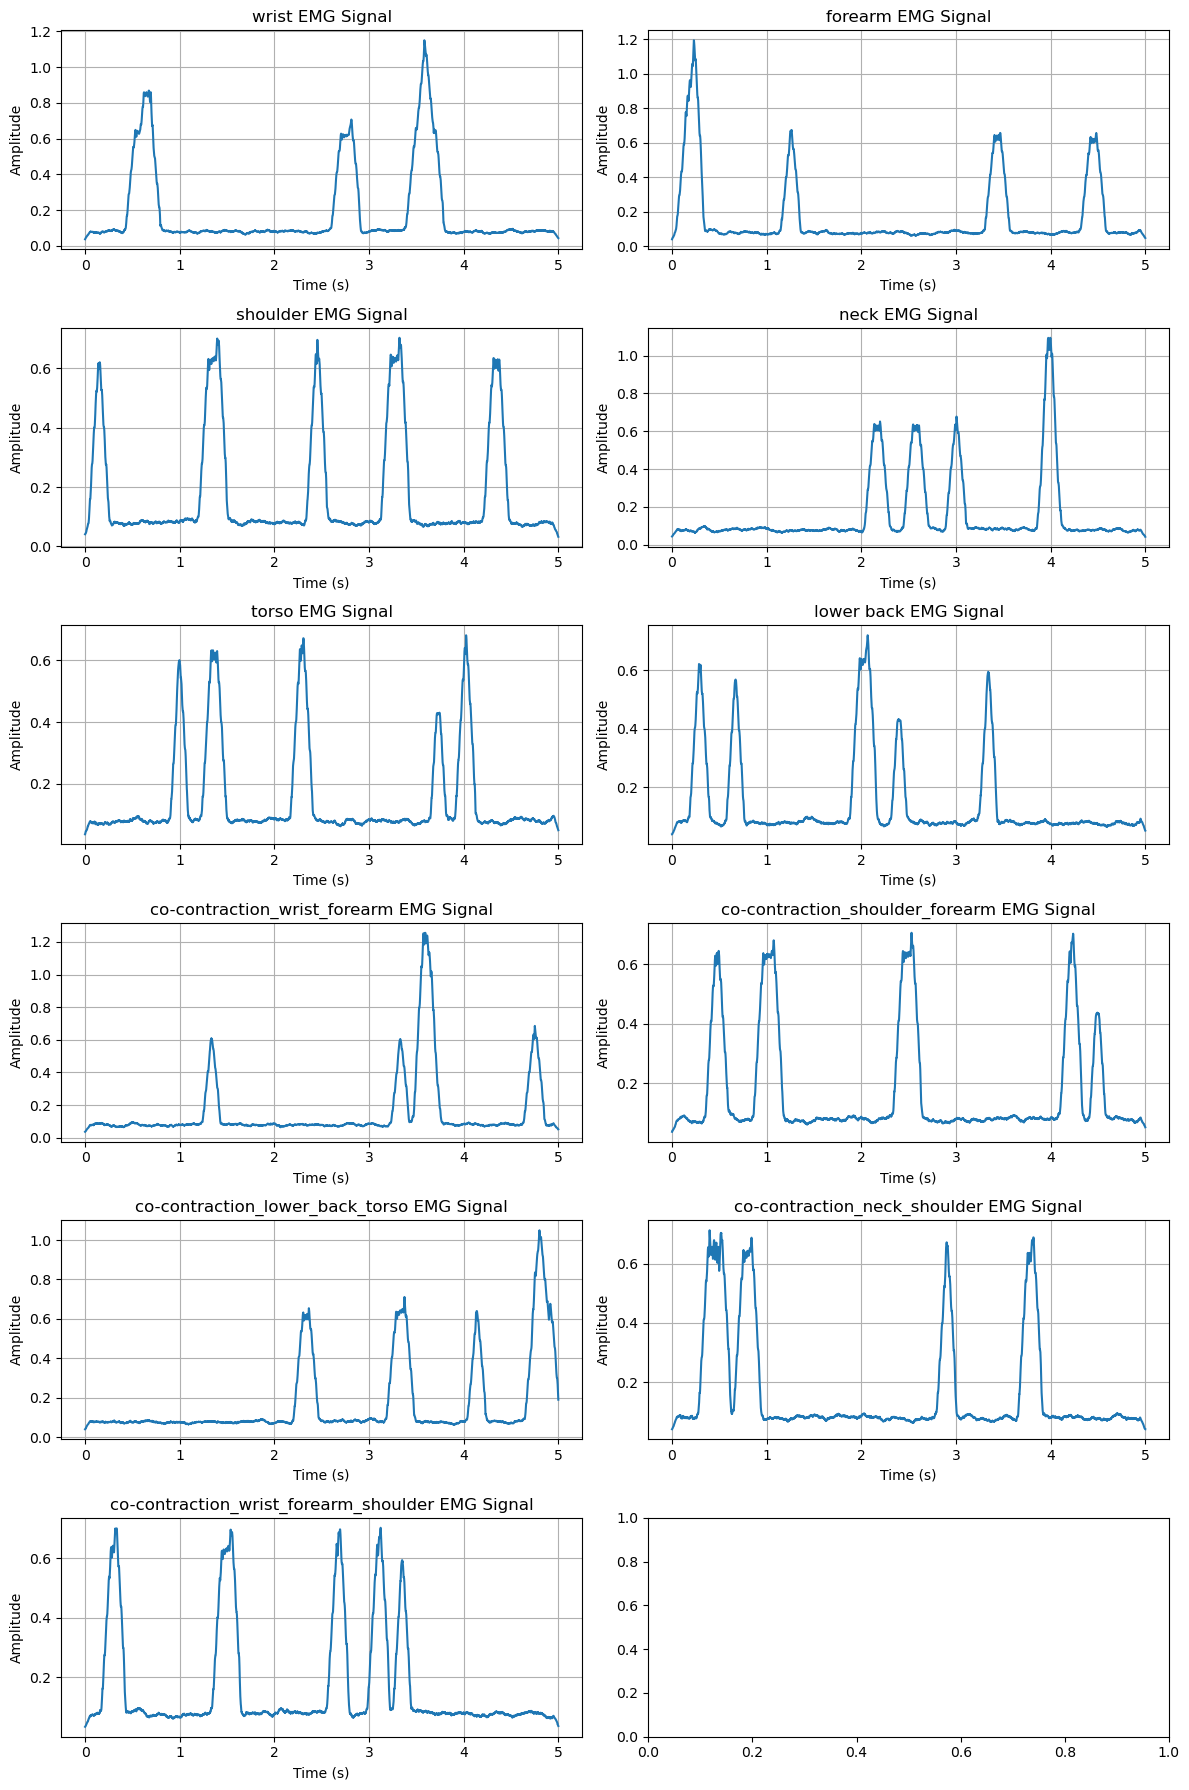

In [ ]:
# simulating co-contraction with multiple muscle activity combinations in drummers

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# sampling parameters
fs = 1000  # sampling frequency (Hz)
duration = 5  # signal duration (seconds)
time = np.linspace(0, duration, fs * duration)

# function to generate realistic EMG signals with contraction and co-contraction
def generate_realistic_emg_signal(frequency=1, noise_level=0.1, length=5000, bursts=True, co_contraction=False, muscle_group=None):
    # generate background muscle activity (low-frequency component)
    emg_signal = 0.5 * np.sin(2 * np.pi * frequency * time[:length])
    
    # add bursts (phasic activity)
    if bursts:
        # generate random bursts of high-frequency muscle contractions
        burst_intervals = np.random.randint(50, 200, 5)  # random burst intervals
        for interval in burst_intervals:
            burst_start = np.random.randint(0, length - interval)
            emg_signal[burst_start:burst_start + interval] += 2 * np.sin(2 * np.pi * 20 * time[:interval])
    
    # add co-contraction: multiple muscle groups contracting at the same time
    if co_contraction:
        if muscle_group == "wrist_forearm":
            forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length])  # forearm with high frequency
            wrist_signal = 0.5 * np.sin(2 * np.pi * 2 * time[:length])  # wrist with low frequency
            combined_signal = 0.5 * (forearm_signal + wrist_signal)  # simulate co-contraction
        elif muscle_group == "shoulder_forearm":
            forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length])  # forearm with high frequency
            shoulder_signal = 0.4 * np.sin(2 * np.pi * 1.5 * time[:length])  # shoulder with medium frequency
            combined_signal = 0.5 * (forearm_signal + shoulder_signal)  # simulate co-contraction
        elif muscle_group == "lower_back_torso":
            lower_back_signal = 0.4 * np.sin(2 * np.pi * 0.7 * time[:length])  # lower back with low frequency
            torso_signal = 0.3 * np.sin(2 * np.pi * 0.5 * time[:length])  # torso with low frequency
            combined_signal = 0.5 * (lower_back_signal + torso_signal)  # simulate co-contraction
        elif muscle_group == "neck_shoulder":
            neck_signal = 0.4 * np.sin(2 * np.pi * 1.0 * time[:length])  # neck with low frequency
            shoulder_signal = 0.5 * np.sin(2 * np.pi * 1.5 * time[:length])  # shoulder with medium frequency
            combined_signal = 0.5 * (neck_signal + shoulder_signal)  # simulate co-contraction
        elif muscle_group == "wrist_forearm_shoulder":
            wrist_signal = 0.5 * np.sin(2 * np.pi * 2 * time[:length])  # wrist with low frequency
            forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length])  # forearm with high frequency
            shoulder_signal = 0.4 * np.sin(2 * np.pi * 1.5 * time[:length])  # shoulder with medium frequency
            combined_signal = 0.33 * (wrist_signal + forearm_signal + shoulder_signal)  # simulate co-contraction
        # add the combined co-contraction signal to the original signal
        emg_signal += combined_signal
    # add random noise (to simulate electrode noise and real variability)
    noise = noise_level * np.random.randn(length)
    
    return emg_signal + noise

# bandpass filter function
def bandpass_filter(signal, lowcut=20.0, highcut=499.0, fs=1000, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency is half the sampling rate
    low = lowcut / nyquist  # normalise the low cutoff frequency
    high = highcut / nyquist  # normalise the high cutoff frequency
    # ensure frequencies are within the valid range
    if not (0 < low < 1 and 0 < high < 1):
        raise ValueError(f"Critical frequencies must satisfy 0 < low < high < 1, but got low={low}, high={high}.")
    # create the butterworth filter
    b, a = butter(order, [low, high], btype='band')
    # apply the filter to the signal using filtfilt (zero-phase filtering)
    return filtfilt(b, a, signal)

# simulate EMG signals for different muscle groups
muscle_groups = {
    'wrist': generate_realistic_emg_signal(frequency=2, co_contraction=False),
    'forearm': generate_realistic_emg_signal(frequency=2.5, co_contraction=False),
    'shoulder': generate_realistic_emg_signal(frequency=1.5, co_contraction=False),
    'neck': generate_realistic_emg_signal(frequency=1, co_contraction=False),
    'torso': generate_realistic_emg_signal(frequency=0.5, co_contraction=False),
    'lower back': generate_realistic_emg_signal(frequency=0.7, co_contraction=False),
    'co-contraction_wrist_forearm': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="wrist_forearm"),
    'co-contraction_shoulder_forearm': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="shoulder_forearm"),
    'co-contraction_lower_back_torso': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="lower_back_torso"),
    'co-contraction_neck_shoulder': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="neck_shoulder"),
    'co-contraction_wrist_forearm_shoulder': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="wrist_forearm_shoulder")
}

# check the dimensions and make sure to work with 1D arrays
for muscle, signal in muscle_groups.items():
    if signal.ndim != 1:
        raise ValueError(f"The EMG signal for {muscle} is not 1D, it has shape {signal.shape}.")

# bandpass filtering, rectifying, and smoothing all signals
filtered_signals = {}
smoothed_signals = {}

for muscle, signal in muscle_groups.items():
    try:
        filtered_signal = bandpass_filter(signal, lowcut=20, highcut=499, fs=fs)
        rectified_signal = np.abs(filtered_signal)  # Rectification
        smoothed_signal = np.convolve(rectified_signal, np.ones(100) / 100, mode='same')  # moving average smoothing
        
        filtered_signals[muscle] = filtered_signal
        smoothed_signals[muscle] = smoothed_signal
    except ValueError as e:
        print(f"Error during signal processing for {muscle}: {e}")
        raise

# plot all signals for analysis
fig, ax = plt.subplots(6, 2, figsize=(12, 18))

# plot each muscle group's processed EMG signal
muscles = list(smoothed_signals.keys())
for i, muscle in enumerate(muscles):
    row, col = divmod(i, 2)  # get the row and column for subplot
    ax[row, col].plot(time[:len(smoothed_signals[muscle])], smoothed_signals[muscle])
    ax[row, col].set_title(f'{muscle} EMG Signal')
    ax[row, col].set_xlabel('Time (s)')
    ax[row, col].set_ylabel('Amplitude')
    ax[row, col].grid()

plt.tight_layout()
plt.show()

# Full EMG Analysis

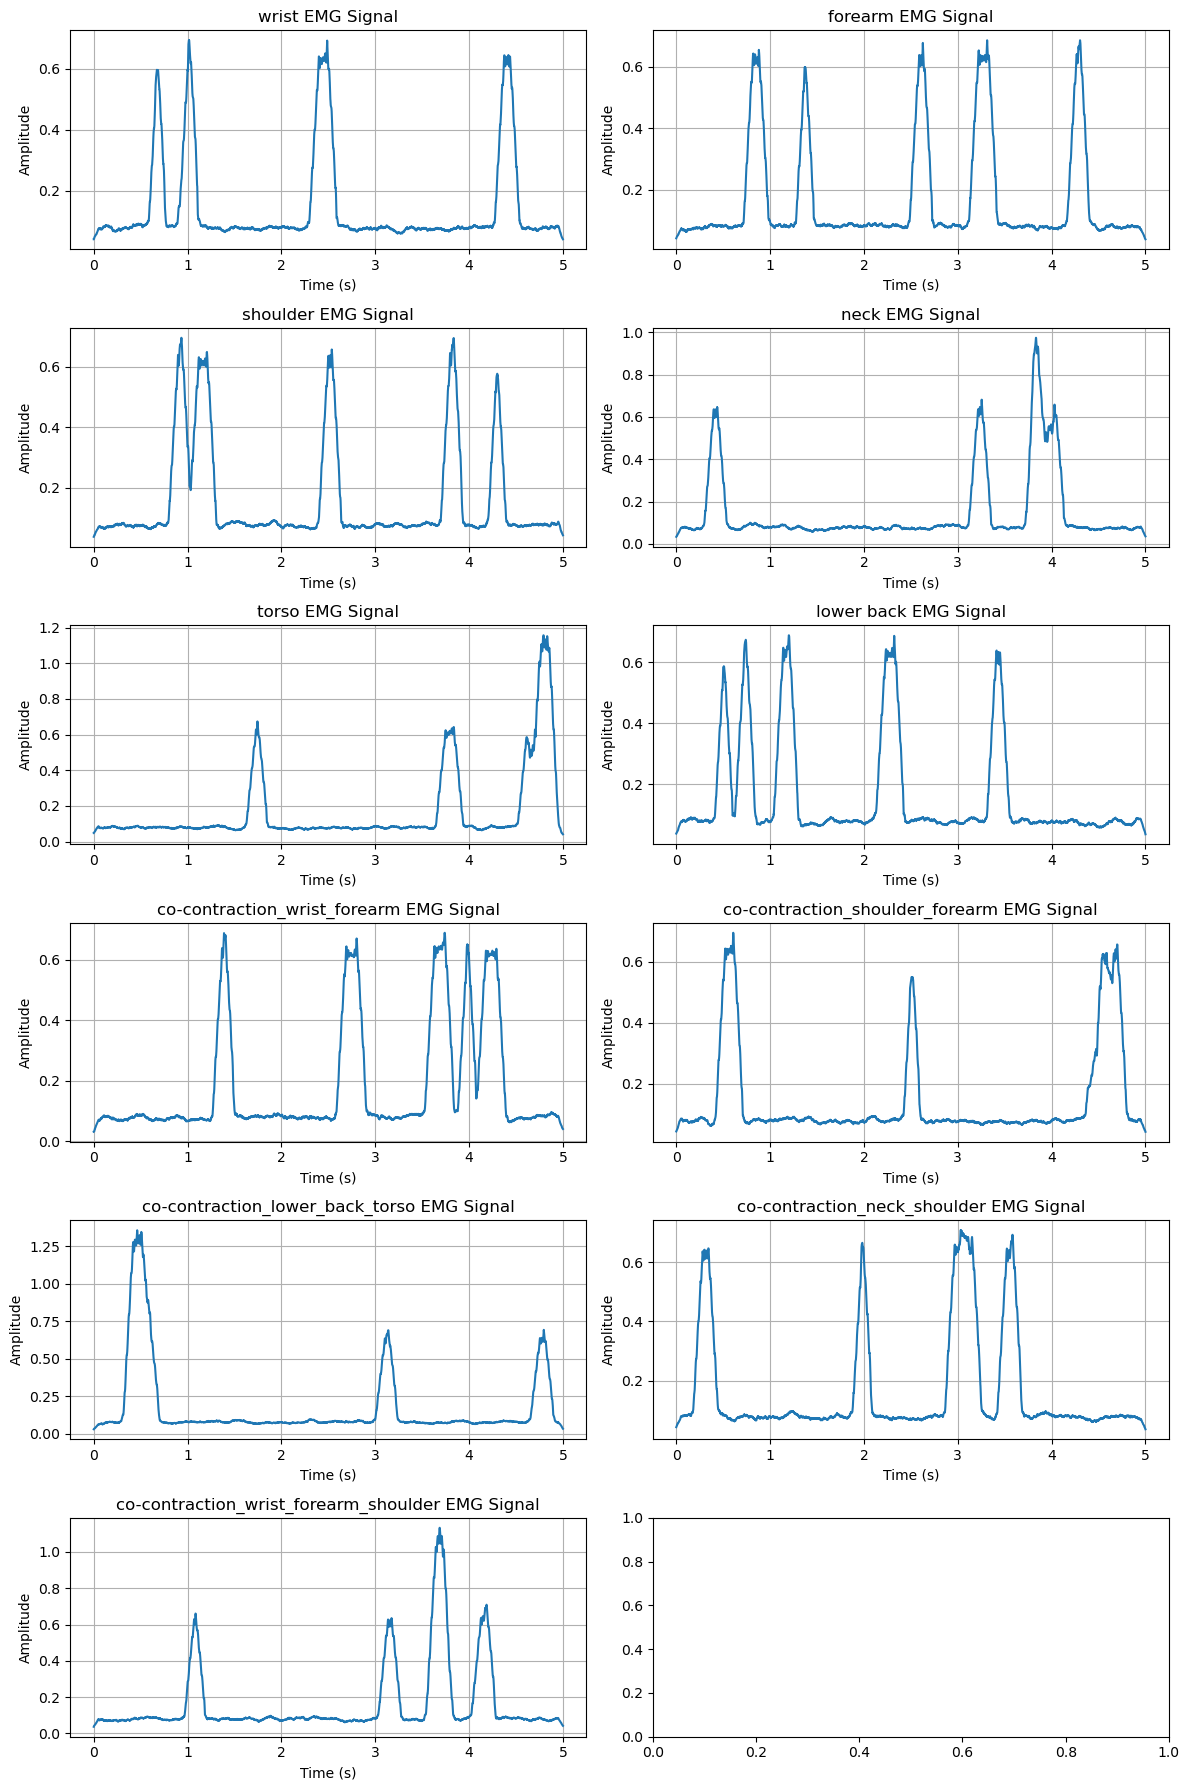


Features for wrist:
  RMS: 0.2121
  MAV: 0.1435
  Zero Crossings: 0.0000
  Slope Sign Changes: 2031.0000
  iEMG: 717.6938

Features for forearm:
  RMS: 0.2413
  MAV: 0.1670
  Zero Crossings: 0.0000
  Slope Sign Changes: 1895.0000
  iEMG: 834.9050

Features for shoulder:
  RMS: 0.2313
  MAV: 0.1577
  Zero Crossings: 0.0000
  Slope Sign Changes: 1971.0000
  iEMG: 788.3006

Features for neck:
  RMS: 0.2321
  MAV: 0.1486
  Zero Crossings: 0.0000
  Slope Sign Changes: 2025.0000
  iEMG: 743.0818

Features for torso:
  RMS: 0.2708
  MAV: 0.1641
  Zero Crossings: 0.0000
  Slope Sign Changes: 2045.0000
  iEMG: 820.3896

Features for lower back:
  RMS: 0.2339
  MAV: 0.1607
  Zero Crossings: 0.0000
  Slope Sign Changes: 1909.0000
  iEMG: 803.5091

Features for co-contraction_wrist_forearm:
  RMS: 0.2624
  MAV: 0.1814
  Zero Crossings: 0.0000
  Slope Sign Changes: 1897.0000
  iEMG: 907.0049

Features for co-contraction_shoulder_forearm:
  RMS: 0.2082
  MAV: 0.1408
  Zero Crossings: 0.0000
  Slope

In [ ]:
###  Full EMG analysis pipeline from signal acquisition (simulation), preprocessing, feature extraction, and visualization

# sampling parameters
fs = 1000  # sampling frequency (Hz)
duration = 5  # signal duration (seconds)
time = np.linspace(0, duration, fs * duration)

# function to generate realistic EMG signals with contraction and co-contraction
def generate_realistic_emg_signal(frequency=1, noise_level=0.1, length=5000, bursts=True, co_contraction=False, muscle_group=None):
    # generate background muscle activity (low-frequency component)
    emg_signal = 0.5 * np.sin(2 * np.pi * frequency * time[:length])
    # add bursts (phasic activity)
    if bursts:
        # generate random bursts of high-frequency muscle contractions
        burst_intervals = np.random.randint(50, 200, 5)  # random burst intervals
        for interval in burst_intervals:
            burst_start = np.random.randint(0, length - interval)
            emg_signal[burst_start:burst_start + interval] += 2 * np.sin(2 * np.pi * 20 * time[:interval])
    # add co-contraction: multiple muscle groups contracting at the same time
    if co_contraction:
        if muscle_group == "wrist_forearm":
            forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length]) # forearm with higher frequency
            wrist_signal = 0.5 * np.sin(2 * np.pi * 2 * time[:length])  # wrist with lower frequency
            combined_signal = 0.5 * (forearm_signal + wrist_signal)  # simulate co-contraction
        elif muscle_group == "shoulder_forearm":
            forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length])  # forearm with higher frequency
            shoulder_signal = 0.4 * np.sin(2 * np.pi * 1.5 * time[:length])  # shoulder with medium frequency
            combined_signal = 0.5 * (forearm_signal + shoulder_signal)  # simulate co-contraction
        elif muscle_group == "lower_back_torso":
            lower_back_signal = 0.4 * np.sin(2 * np.pi * 0.7 * time[:length])  # lower back with low frequency
            torso_signal = 0.3 * np.sin(2 * np.pi * 0.5 * time[:length])  # torso with low frequency
            combined_signal = 0.5 * (lower_back_signal + torso_signal)  # simulate co-contraction
        elif muscle_group == "neck_shoulder":
            neck_signal = 0.4 * np.sin(2 * np.pi * 1.0 * time[:length])  # neck with low frequency
            shoulder_signal = 0.5 * np.sin(2 * np.pi * 1.5 * time[:length])  # shoulder with medium frequency
            combined_signal = 0.5 * (neck_signal + shoulder_signal)  # simulate co-contraction
        elif muscle_group == "wrist_forearm_shoulder":
            wrist_signal = 0.5 * np.sin(2 * np.pi * 2 * time[:length])  # wrist with lower frequency
            forearm_signal = 0.6 * np.sin(2 * np.pi * 2.5 * time[:length])  # forearm with higher frequency
            shoulder_signal = 0.4 * np.sin(2 * np.pi * 1.5 * time[:length])  # shoulder with medium frequency
            combined_signal = 0.33 * (wrist_signal + forearm_signal + shoulder_signal)  # simulate co-contraction
        # add the combined co-contraction signal to the original signal
        emg_signal += combined_signal
    # add random noise (to simulate electrode noise and real variability)
    noise = noise_level * np.random.randn(length)
    
    return emg_signal + noise

# bandpass filter function
def bandpass_filter(signal, lowcut=20.0, highcut=499.0, fs=1000, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency is half the sampling rate
    low = lowcut / nyquist  # normalise the low cutoff frequency
    high = highcut / nyquist  # normalise the high cutoff frequency
    
    # ensure frequencies are within the valid range
    if not (0 < low < 1 and 0 < high < 1):
        raise ValueError(f"Critical frequencies must satisfy 0 < low < high < 1, but got low={low}, high={high}.")
    
    # create the Butterworth filter
    b, a = butter(order, [low, high], btype='band')
    
    # apply the filter to the signal using filtfilt (zero-phase filtering)
    return filtfilt(b, a, signal)

# feature extraction functions
def rms(signal):
    return np.sqrt(np.mean(signal**2))

def mav(signal):
    return np.mean(np.abs(signal))

def zero_crossings(signal):
    return np.count_nonzero(np.diff(np.sign(signal)) != 0)

def slope_sign_changes(signal):
    return np.count_nonzero(np.diff(np.sign(np.diff(signal))) != 0)

def iemg(signal):
    return np.sum(np.abs(signal))

# simulate EMG signals for different muscle groups
muscle_groups = {
    'wrist': generate_realistic_emg_signal(frequency=2, co_contraction=False),
    'forearm': generate_realistic_emg_signal(frequency=2.5, co_contraction=False),
    'shoulder': generate_realistic_emg_signal(frequency=1.5, co_contraction=False),
    'neck': generate_realistic_emg_signal(frequency=1, co_contraction=False),
    'torso': generate_realistic_emg_signal(frequency=0.5, co_contraction=False),
    'lower back': generate_realistic_emg_signal(frequency=0.7, co_contraction=False),
    'co-contraction_wrist_forearm': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="wrist_forearm"),
    'co-contraction_shoulder_forearm': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="shoulder_forearm"),
    'co-contraction_lower_back_torso': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="lower_back_torso"),
    'co-contraction_neck_shoulder': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="neck_shoulder"),
    'co-contraction_wrist_forearm_shoulder': generate_realistic_emg_signal(frequency=0.7, co_contraction=True, muscle_group="wrist_forearm_shoulder")
}

# check if all signals are 1D arrays
for muscle, signal in muscle_groups.items():
    if signal.ndim != 1:
        raise ValueError(f"The EMG signal for {muscle} is not 1D, it has shape {signal.shape}.")

# bandpass filtering, rectifying, and smoothing all signals
filtered_signals = {}
smoothed_signals = {}
features = {}

for muscle, signal in muscle_groups.items():
    try:
        # bandpass filter the signal
        filtered_signal = bandpass_filter(signal, lowcut=20, highcut=499, fs=fs)
        # rectify the signal
        rectified_signal = np.abs(filtered_signal)
        # smooth the signal (moving average)
        smoothed_signal = np.convolve(rectified_signal, np.ones(100) / 100, mode='same')
        # feature extraction
        features[muscle] = {
            'RMS': rms(smoothed_signal),
            'MAV': mav(smoothed_signal),
            'Zero Crossings': zero_crossings(smoothed_signal),
            'Slope Sign Changes': slope_sign_changes(smoothed_signal),
            'iEMG': iemg(smoothed_signal)
        }
        
        # store filtered and smoothed signals
        filtered_signals[muscle] = filtered_signal
        smoothed_signals[muscle] = smoothed_signal
        
    except ValueError as e:
        print(f"Error during signal processing for {muscle}: {e}")
        raise

# plot all signals for analysis
fig, ax = plt.subplots(6, 2, figsize=(12, 18))

# plot each muscle group's processed EMG signal
muscles = list(smoothed_signals.keys())
for i, muscle in enumerate(muscles):
    row, col = divmod(i, 2)  # get the row and column for subplot
    ax[row, col].plot(time[:len(smoothed_signals[muscle])], smoothed_signals[muscle])
    ax[row, col].set_title(f'{muscle} EMG Signal')
    ax[row, col].set_xlabel('Time (s)')
    ax[row, col].set_ylabel('Amplitude')
    ax[row, col].grid()

plt.tight_layout()
plt.show()

# display extracted features for each muscle group
for muscle, feature in features.items():
    print(f"\nFeatures for {muscle}:")
    for feature_name, value in feature.items():
        print(f"  {feature_name}: {value:.4f}")

# Final Step: Statistical Analyses of the Simulated EMG Data

1. Descriptive Statistics: Provides summary statistics like mean, standard deviation, and IQR for each feature across muscles.
2. Correlation Analysis: Helps identify if different features are correlated across muscles, indicating similarity in muscle activity.
3. ANOVA: Tests for significant differences in the feature values (e.g., RMS) between different muscle groups.
4. t-Test: Allows comparison of features (e.g., RMS) between two conditions or muscle groups.
5. Fatigue Analysis: Visualises the trend of muscle activity over time, useful for identifying muscle fatigue.
6. Power Spectral Density identifies frequency components of the muscle activity signal.


In [ ]:
# feature extraction for each muscle group
def extract_emg_features(signal):
    rms = np.sqrt(np.mean(np.square(signal)))  # Root Mean Square
    mav = np.mean(np.abs(signal))  # Mean Absolute Value
    iemg = np.sum(np.abs(signal))  # integrated EMG
    return {"RMS": rms, "MAV": mav, "iEMG": iemg}

# extract features for each muscle group
features = {}

for muscle, signal in muscle_groups.items():
    filtered_signal = bandpass_filter(signal, lowcut=20, highcut=499, fs=fs)
    rectified_signal = np.abs(filtered_signal)  # rectification
    smoothed_signal = np.convolve(rectified_signal, np.ones(100) / 100, mode='same')  # moving average smoothing
    features[muscle] = extract_emg_features(smoothed_signal)

### convert features into a dataframe for easier analysis

# organise features into a dataframe
features_df = pd.DataFrame(features).T  # Transpose to make muscles the rows

# display first few rows of features
print(features_df.head())

               RMS       MAV        iEMG
wrist     0.212100  0.143539  717.693823
forearm   0.241278  0.166981  834.905046
shoulder  0.231270  0.157660  788.300551
neck      0.232072  0.148616  743.081779
torso     0.270849  0.164078  820.389644


In [ ]:
### feature extraction of EMG data for statistical snalyses

# from scipy.integrate import simpson  # Correct import for Simpson's Rule

# function to calculate RMS (Root Mean Square)
def calculate_rms(signal):
    return np.sqrt(np.mean(signal**2))

# function to calculate MAV (Mean Absolute Value)
def calculate_mav(signal):
    return np.mean(np.abs(signal))

# function to calculate iEMG (integral of EMG)
def calculate_iemg(signal, time_step=1):
    return simpson(np.abs(signal), dx=time_step)

# example: List of muscle groups (simulated signals in "muscle_groups")
muscle_groups = {
    'wrist': np.random.randn(5000),  # simulated data for all body parts
    'forearm': np.random.randn(5000),
    'shoulder': np.random.randn(5000),
    'neck': np.random.randn(5000),
    'torso': np.random.randn(5000),
    'lower back': np.random.randn(5000),
}

# extract features for each muscle group
features = {}

for muscle, signal in muscle_groups.items():
    rms = calculate_rms(signal)
    mav = calculate_mav(signal)
    iemg = calculate_iemg(signal)
    features[muscle] = [rms, mav, iemg]

# convert the feature dictionary into a pandas dataframe
features_df = pd.DataFrame(features, index=['RMS', 'MAV', 'iEMG']).T

In [ ]:
### descriptive statistics

# simulated EMG feature data for each muscle group (RMS, MAV, iEMG values)
muscle_groups = ['wrist', 'forearm', 'shoulder', 'neck', 'torso', 'lower back']
rms_values = np.random.rand(6)  # placeholder RMS data for each muscle
mav_values = np.random.rand(6)  # placeholder MAV data for each muscle
iemg_values = np.random.rand(6)  # placeholder iEMG data for each muscle

# create a dataframe with muscle group data
features_df = pd.DataFrame({
    'muscle': muscle_groups,
    'RMS': rms_values,
    'MAV': mav_values,
    'iEMG': iemg_values
})

# descriptive statistics
descriptive_stats = features_df.drop(columns='muscle').describe()  # calculate descriptive statistics for RMS, MAV, and iEMG
print("Descriptive Statistics of EMG Features (RMS, MAV, iEMG):")
print(descriptive_stats)  # show all statistics (count, mean, std, min, 25%, 50%, 75%, max)

Descriptive Statistics of EMG Features (RMS, MAV, iEMG):
            RMS       MAV      iEMG
count  6.000000  6.000000  6.000000
mean   0.251992  0.601316  0.360481
std    0.150342  0.306626  0.211859
min    0.067170  0.284913  0.097210
25%    0.130149  0.351153  0.188885
50%    0.276498  0.536843  0.378676
75%    0.348745  0.871913  0.548072
max    0.437596  0.976441  0.578168


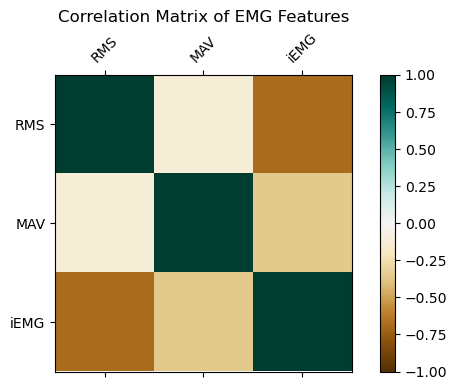

In [ ]:
# correlation heatmap

# calculate correlation matrix
correlation_matrix = features_df.drop(columns='muscle').corr()

# plot the correlation heatmap
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(correlation_matrix, cmap='BrBG', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)
ax.set_title("Correlation Matrix of EMG Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
### ANOVA

# perform ANOVA for RMS values across muscle groups
rms_values_by_muscle = [features_df[features_df['muscle'] == muscle]['RMS'] for muscle in muscle_groups]
anova_result_rms = f_oneway(*rms_values_by_muscle)
print(f"ANOVA result for RMS values across muscle groups: F-statistic = {anova_result_rms.statistic:.2f}, p-value = {anova_result_rms.pvalue:.4f}")

ANOVA result for RMS values across muscle groups: F-statistic = nan, p-value = nan


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if _f_oneway_is_too_small(samples):


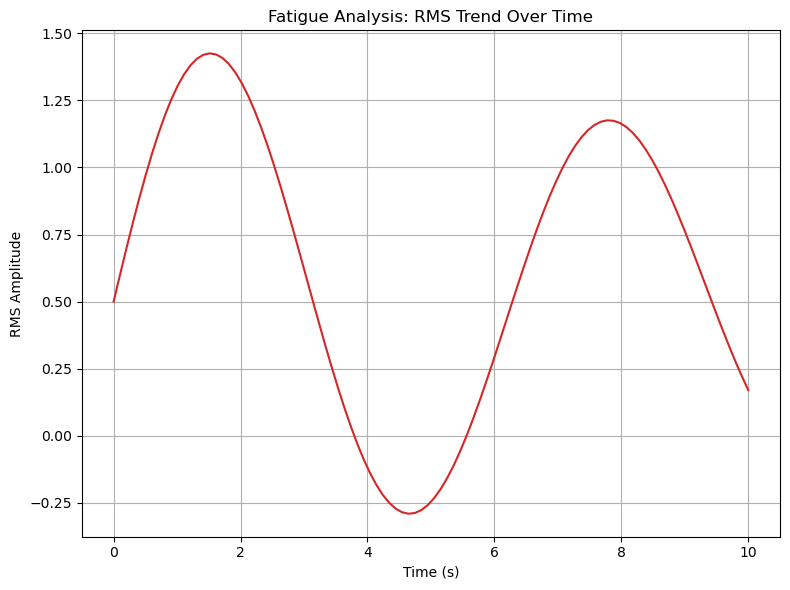

In [ ]:
# fatigue analysis (visualisation)

# simulating RMS data over time for fatigue analysis (just for visualisation)
time = np.linspace(0, 10, 100)  # simulate 10 seconds of time with 100 samples
rms_trend = np.sin(time) * np.exp(-0.05 * time) + 0.5  # simulating fatigue with exponential decay

# plotting the fatigue trend
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time, rms_trend, label="RMS Trend with Fatigue", color='tab:red')
ax.set_title("Fatigue Analysis: RMS Trend Over Time")
ax.set_xlabel("Time (s)")
ax.set_ylabel("RMS Amplitude")
ax.grid(True)
plt.tight_layout()
plt.show()

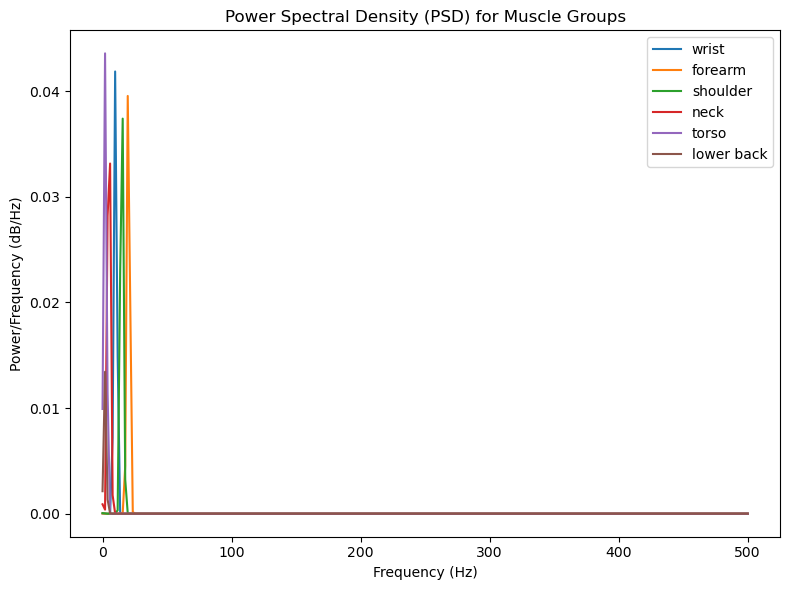

In [ ]:
# power spectral density (PSD) for muscle groups

# simulating realistic EMG signal
fs = 1000  # sampling frequency (Hz)
time = np.linspace(0, 5, fs * 5)  # 5 seconds of data

# generate synthetic EMG signals with known frequency components per muscle group
muscle_groups = ['wrist', 'forearm', 'shoulder', 'neck', 'torso', 'lower back']
frequency_components = [10, 20, 15, 5, 2, 1]  # different frequency for each muscle group (Hz)

# create a synthetic EMG signal for each muscle group (using sine wave)
synthetic_signals = {}

for i, muscle in enumerate(muscle_groups):
    signal = 0.5 * np.sin(2 * np.pi * frequency_components[i] * time)  # simulated muscle signal with frequency components
    synthetic_signals[muscle] = signal

# now, calculate and plot the PSD for each muscle group

fig, ax = plt.subplots(figsize=(8, 6))

for muscle in muscle_groups:
    signal = synthetic_signals[muscle]
    f, Pxx = welch(signal, fs=fs, nperseg=512)  # use Welch's method to estimate PSD
    ax.plot(f, Pxx, label=muscle)

ax.set_title("Power Spectral Density (PSD) for Muscle Groups")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power/Frequency (dB/Hz)")
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()